In [55]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: plotly in c:\users\leish\anaconda3\lib\site-packages (from catboost) (5.6.0)



In [2]:
import numpy as np
import pandas as pd 
import os


# In[2]:

# 导入相关的包
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.cm as cm

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder               # 编码转换
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.ensemble import RandomForestClassifier          # 随机森林
from sklearn.svm import SVC, LinearSVC                       # 支持向量机
from sklearn.linear_model import LogisticRegression          # 逻辑回归
from sklearn.neighbors import KNeighborsClassifier           # KNN算法
from sklearn.naive_bayes import GaussianNB                   # 朴素贝叶斯
from sklearn.tree import DecisionTreeClassifier              # 决策树分类器
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier     

from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.ensemble import VotingClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from sklearn import metrics
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [4]:
# load data
df = pd.read_csv('cell2celltrain.csv')
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,...,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,9,No,0,30,No,5-Low,Other,Other,No


In [5]:
df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [6]:
df.shape

(51047, 58)

In [7]:
df["Churn"].value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

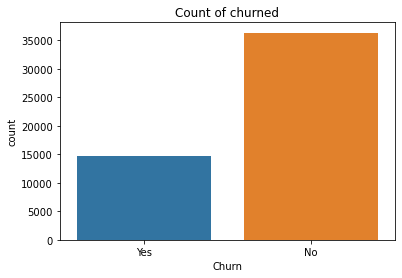

In [8]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Count of churned")
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [9]:
df.isnull().sum()

CustomerID                     0
Churn                          0
MonthlyRevenue               156
MonthlyMinutes               156
TotalRecurringCharge         156
DirectorAssistedCalls        156
OverageMinutes               156
RoamingCalls                 156
PercChangeMinutes            367
PercChangeRevenues           367
DroppedCalls                   0
BlockedCalls                   0
UnansweredCalls                0
CustomerCareCalls              0
ThreewayCalls                  0
ReceivedCalls                  0
OutboundCalls                  0
InboundCalls                   0
PeakCallsInOut                 0
OffPeakCallsInOut              0
DroppedBlockedCalls            0
CallForwardingCalls            0
CallWaitingCalls               0
MonthsInService                0
UniqueSubs                     0
ActiveSubs                     0
ServiceArea                   24
Handsets                       1
HandsetModels                  1
CurrentEquipmentDays           1
AgeHH1    

In [9]:
df.shape

(51047, 58)

In [6]:
# number of missing value
na_column = df.columns[df.isnull().sum() != 0]
df[na_column].isnull().sum()

MonthlyRevenue           156
MonthlyMinutes           156
TotalRecurringCharge     156
DirectorAssistedCalls    156
OverageMinutes           156
RoamingCalls             156
PercChangeMinutes        367
PercChangeRevenues       367
ServiceArea               24
Handsets                   1
HandsetModels              1
CurrentEquipmentDays       1
AgeHH1                   909
AgeHH2                   909
dtype: int64

In [7]:
df[na_column].isnull().sum().sum()

3515

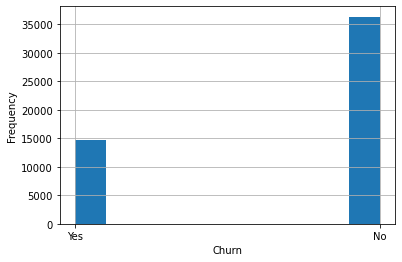

In [8]:
df.Churn.hist();
plt.xlabel('Churn');
plt.ylabel('Frequency');

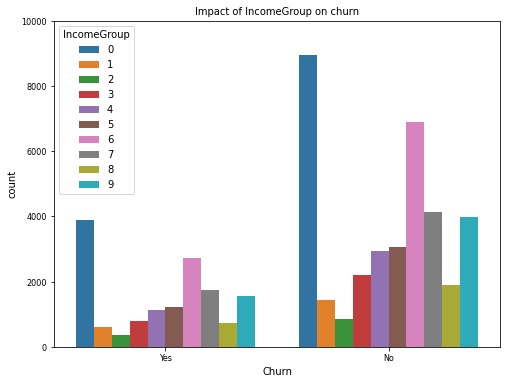

In [282]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Churn', data=df, hue='IncomeGroup')
ax.set_ylim(0,10000)
plt.title("Impact of IncomeGroup on churn")
plt.show()

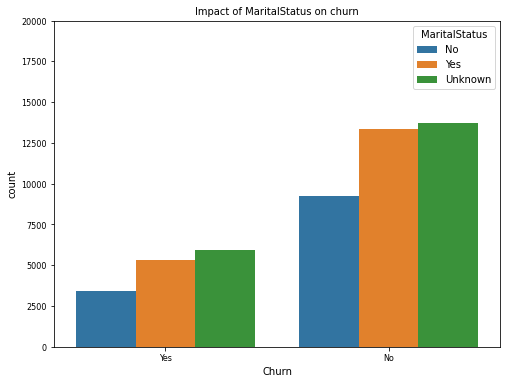

In [284]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Churn', data=df, hue='MaritalStatus')
ax.set_ylim(0,20000)
plt.title("Impact of MaritalStatus on churn")
plt.show()

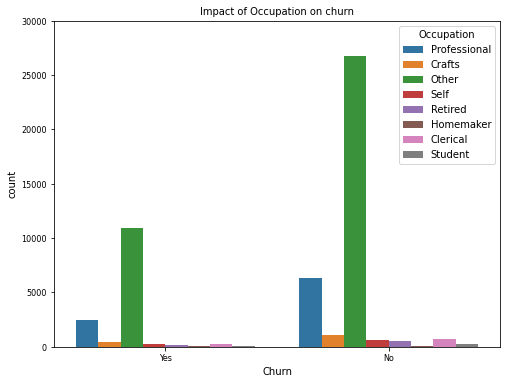

In [286]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Churn', data=df, hue='Occupation')
ax.set_ylim(0,30000)
plt.title("Impact of Occupation on churn")
plt.show()

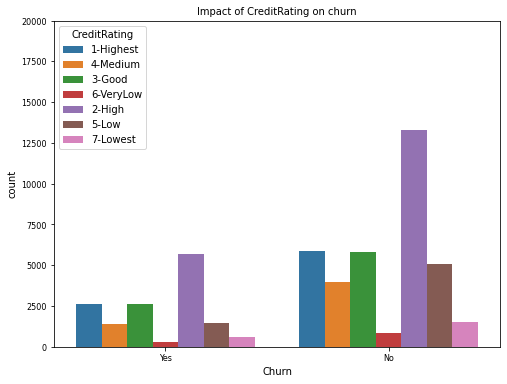

In [288]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='Churn', data=df, hue='CreditRating')
ax.set_ylim(0,20000)
plt.title("Impact of CreditRating on churn")
plt.show()

In [13]:
df.Churn.value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

## Data Cleaning and EDA

In [9]:
# replace missing values in numerical columns with 0
for col in na_column:
    if col != 'ServiceArea':
        df[col].fillna(0, inplace = True)

In [10]:
# numerical columns and non-numerical columns
num_cols = df.columns[df.dtypes != 'object']
obj_cols = df.columns[df.dtypes == 'object']

In [16]:
num_cols

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls',
       'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup',
       'AdjustmentsToCreditRating'],
      dtype='object')

In [17]:
obj_cols

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice',
       'MadeCallToRetentionTeam', 'CreditRating', 'PrizmCode', 'Occupation',
       'MaritalStatus'],
      dtype='object')

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.0,3.201957e+06,116905.561666,3000002.00,3100632.0,3201534.00,3305376.00,3399994.00
MonthlyRevenue,51047.0,5.865469e+01,44.557776,-6.17,33.5,48.29,70.96,1223.38
MonthlyMinutes,51047.0,5.240470e+02,529.855789,0.00,156.0,365.00,722.00,7359.00
TotalRecurringCharge,51047.0,4.668697e+01,23.952288,-11.00,30.0,45.00,60.00,400.00
DirectorAssistedCalls,51047.0,8.924932e-01,2.225687,0.00,0.0,0.25,0.99,159.39
OverageMinutes,51047.0,3.990546e+01,96.465678,0.00,0.0,2.00,40.00,4321.00
RoamingCalls,51047.0,1.232466e+00,9.803517,0.00,0.0,0.00,0.20,1112.40
PercChangeMinutes,51047.0,-1.146489e+01,256.589244,-3875.00,-82.0,-4.00,65.00,5192.00
PercChangeRevenues,51047.0,-1.183415e+00,39.432523,-1107.70,-6.9,-0.30,1.55,2483.50
DroppedCalls,51047.0,6.011489e+00,9.043955,0.00,0.7,3.00,7.70,221.70


In [52]:
skew = df[num_cols].skew().sort_values(ascending = False)
skew

CallForwardingCalls          91.634791
UniqueSubs                   79.635758
RoamingCalls                 57.967352
ReferralsMadeBySubscriber    36.739725
AdjustmentsToCreditRating    18.623149
ThreewayCalls                17.553060
CustomerCareCalls            14.235913
DirectorAssistedCalls        13.582103
CallWaitingCalls             11.121429
ActiveSubs                   10.647697
BlockedCalls                  9.790454
RetentionOffersAccepted       8.699968
OverageMinutes                8.123530
PercChangeRevenues            7.913070
RetentionCalls                6.296663
InboundCalls                  5.927980
DroppedBlockedCalls           5.522108
DroppedCalls                  4.549222
UnansweredCalls               4.381230
MonthlyRevenue                4.159909
OutboundCalls                 3.525679
OffPeakCallsInOut             3.493146
PeakCallsInOut                3.327854
Handsets                      3.288569
ReceivedCalls                 3.115673
HandsetModels            

In [11]:
# log transform skewed variables
# he objective of choosing features with skewed_feats>0.75 is because we are searching 
# to work with features that have a more normal-like distribution 
skew = df[num_cols].skew().sort_values(ascending = False)
skew = skew[skew > 0.75].index.tolist()
len(skew)

30

In [12]:
for c in skew:
    if df[c].min() < 0:
        df[c] = df[c] - df[c].min()
    df[c] = df[c].apply(np.log1p)

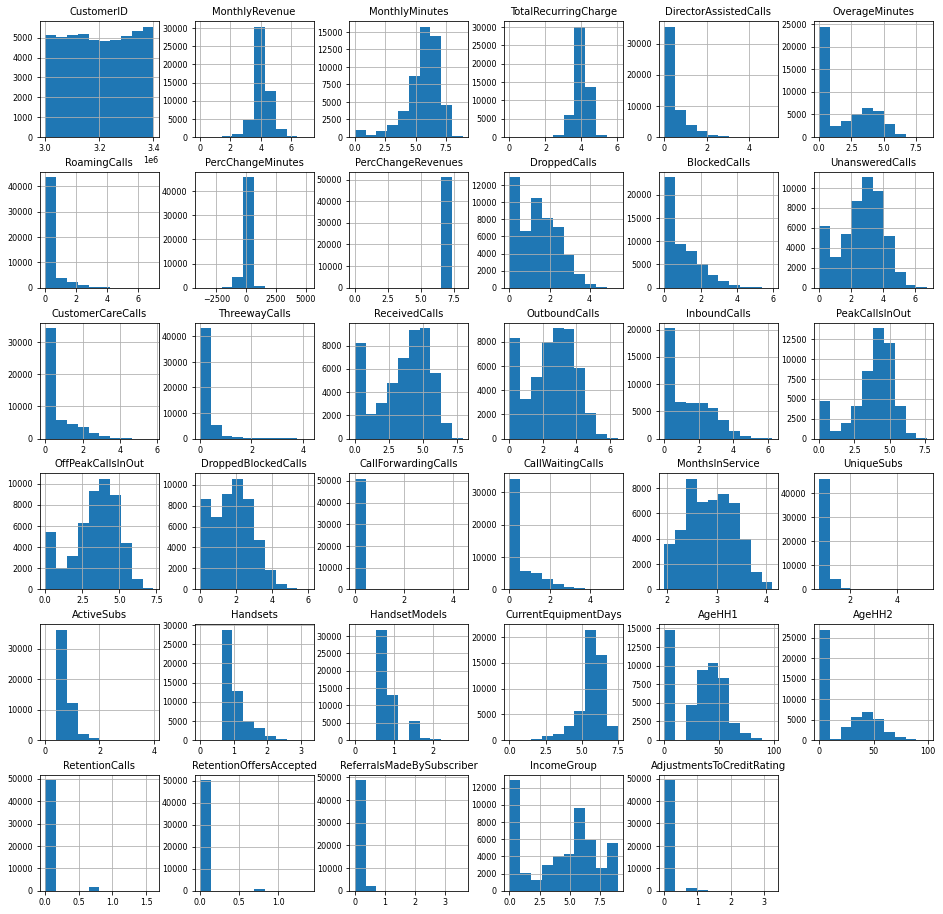

In [21]:
params = {'axes.titlesize':'10',
          'xtick.labelsize':'8',
          'ytick.labelsize':'8'}
matplotlib.rcParams.update(params)
df[num_cols].hist(figsize = (16, 16));

In [13]:
cols = ['ServiceArea',
 'HandsetPrice',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus',]

In [14]:
df[cols] = df[cols].apply(LabelEncoder().fit_transform)

In [24]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,3.439456,5.393628,3.526361,0.223144,0.000000,0.000000,-157.0,6.993658,...,0.0,4,No,0.000000,8,Yes,0,2,4,0
1,3000010,Yes,3.184698,2.397895,3.367296,0.000000,0.000000,0.000000,-4.0,7.010943,...,0.0,5,No,0.000000,8,No,3,2,4,2
2,3000014,No,3.810433,2.197225,3.912023,0.000000,0.000000,0.000000,-2.0,7.010943,...,0.0,6,No,0.000000,15,No,2,3,1,2
3,3000022,No,4.493680,7.180070,4.465908,0.806476,0.000000,0.000000,157.0,7.018223,...,0.0,6,No,0.000000,0,No,3,0,3,0
4,3000026,Yes,3.190888,0.000000,3.367296,0.000000,0.000000,0.000000,0.0,7.010763,...,0.0,9,No,0.693147,0,No,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,1.969906,0.000000,2.484907,0.000000,0.000000,0.000000,0.0,7.010943,...,0.0,6,No,0.000000,13,No,0,2,3,2
51043,3399974,No,4.628301,7.465083,4.574711,0.688135,3.828641,1.740466,122.0,7.025183,...,0.0,9,No,0.693147,13,No,2,0,3,0
51044,3399978,Yes,1.969906,0.000000,2.484907,0.000000,0.000000,0.000000,0.0,7.010943,...,0.0,7,No,0.693147,14,No,4,0,0,0
51045,3399990,No,1.969906,0.000000,2.484907,0.000000,0.000000,0.000000,0.0,7.010943,...,0.0,9,No,0.000000,8,No,4,0,3,0


Text(0.5, 1.0, 'Churn by IncomeGroup')

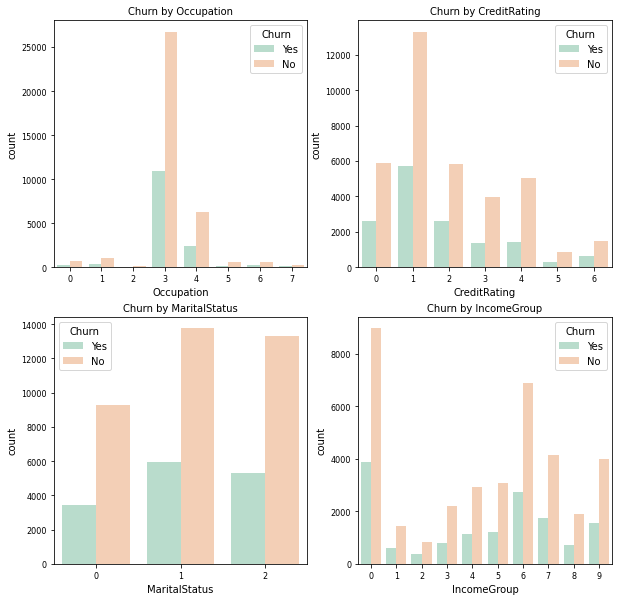

In [25]:
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.subplot(2,2,1)
Occupation=sns.countplot(x="Occupation",hue="Churn",data=df,palette="Pastel2") # palette参数表示设置颜色，这里设置为主题色Pastel2
plt.xlabel("Occupation")
plt.title("Churn by Occupation")

plt.subplot(2,2,2)
CreditRating=sns.countplot(x="CreditRating",hue="Churn",data=df,palette="Pastel2")
plt.xlabel("CreditRating")
plt.title("Churn by CreditRating")

plt.subplot(2,2,3)
MaritalStatus=sns.countplot(x="MaritalStatus",hue="Churn",data=df,palette="Pastel2")
plt.xlabel("MaritalStatus")
plt.title("Churn by MaritalStatus")

plt.subplot(2,2,4)
IncomeGroup=sns.countplot(x="IncomeGroup",hue="Churn",data=df,palette="Pastel2")
plt.xlabel("IncomeGroup")
plt.title("Churn by IncomeGroup")


In [15]:
df['Churn'] = df['Churn'].replace({'Yes':1, 'No': 0})

In [16]:
uniq_val = pd.DataFrame([[c, len(df[c].unique())] for c in df[obj_cols].columns], 
                        columns = ['Variable', 'Number']).set_index('Variable')

In [17]:
uniq_val

,Number
Variable,
Churn,2
ServiceArea,748
ChildrenInHH,2
HandsetRefurbished,2
HandsetWebCapable,2
TruckOwner,2
RVOwner,2
Homeownership,2
BuysViaMailOrder,2


In [18]:
# binary features
bin_cols = uniq_val[uniq_val.Number == 2].index.tolist()
bin_cols

['Churn',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'OwnsMotorcycle',
 'MadeCallToRetentionTeam']

In [19]:
# binarize binary columns
for c in bin_cols:
    df[c] = LabelBinarizer().fit_transform(df[c])

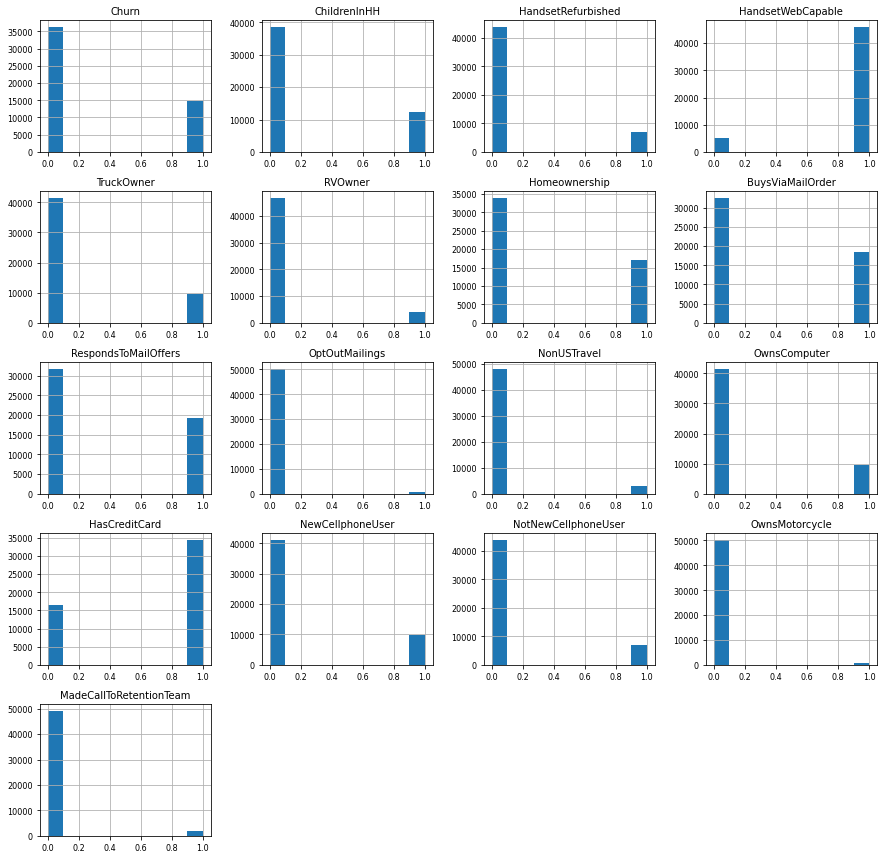

In [31]:
# plot distribution of binary variables
df[bin_cols].hist(figsize = (15, 15));

In [20]:
# other categorical features
other_column = uniq_val[uniq_val.Number > 2].index.tolist()
other_column

['ServiceArea',
 'HandsetPrice',
 'CreditRating',
 'PrizmCode',
 'Occupation',
 'MaritalStatus']

In [63]:
# ordinal variable
df.CreditRating.value_counts(normalize = True)

1    0.372069
0    0.166944
2    0.164750
4    0.127314
3    0.104943
6    0.041413
5    0.022567
Name: CreditRating, dtype: float64

## Feature Engineering

In [230]:
# scale features
# y = df.Churn
# s = MinMaxScaler()
# X = df.copy()
# X.drop(columns = ['Churn'])
# X = s.fit_transform(X)

In [21]:
df['totalcalls'] = df['OutboundCalls'] + df['InboundCalls']

In [35]:
df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,totalcalls
0,3000002,1,3.439456,5.393628,3.526361,0.223144,0.000000,0.000000,-157.0,6.993658,...,4,0,0.000000,8,1,0,2,4,0,0.000000
1,3000010,1,3.184698,2.397895,3.367296,0.000000,0.000000,0.000000,-4.0,7.010943,...,5,0,0.000000,8,0,3,2,4,2,0.000000
2,3000014,0,3.810433,2.197225,3.912023,0.000000,0.000000,0.000000,-2.0,7.010943,...,6,0,0.000000,15,0,2,3,1,2,0.262364
3,3000022,0,4.493680,7.180070,4.465908,0.806476,0.000000,0.000000,157.0,7.018223,...,6,0,0.000000,0,0,3,0,3,0,10.914223
4,3000026,1,3.190888,0.000000,3.367296,0.000000,0.000000,0.000000,0.0,7.010763,...,9,0,0.693147,0,0,0,0,4,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,1,1.969906,0.000000,2.484907,0.000000,0.000000,0.000000,0.0,7.010943,...,6,0,0.000000,13,0,0,2,3,2,3.723281
51043,3399974,0,4.628301,7.465083,4.574711,0.688135,3.828641,1.740466,122.0,7.025183,...,9,0,0.693147,13,0,2,0,3,0,8.042703
51044,3399978,1,1.969906,0.000000,2.484907,0.000000,0.000000,0.000000,0.0,7.010943,...,7,0,0.693147,14,0,4,0,0,0,10.552064
51045,3399990,0,1.969906,0.000000,2.484907,0.000000,0.000000,0.000000,0.0,7.010943,...,9,0,0.000000,8,0,4,0,3,0,0.000000


In [65]:
num=['CustomerID','MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes',
         'RoamingCalls','PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls',
         'ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls'
         ,'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','ServiceArea','Handsets','HandsetModels',              
'CurrentEquipmentDays','AgeHH1','AgeHH2','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings',          
'NonUSTravel','OwnsComputer','HasCreditCard','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser',          
'NotNewCellphoneUser','ReferralsMadeBySubscriber','IncomeGroup','OwnsMotorcycle','AdjustmentsToCreditRating', 
'HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus','totalcalls','Churn']

In [37]:
corr_df=df[num]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

                           CustomerID  MonthlyRevenue  MonthlyMinutes  \
CustomerID                   1.000000       -0.009486        0.086989   
MonthlyRevenue              -0.009486        1.000000        0.661021   
MonthlyMinutes               0.086989        0.661021        1.000000   
TotalRecurringCharge         0.041894        0.768983        0.543841   
DirectorAssistedCalls       -0.001270        0.440398        0.380054   
OverageMinutes               0.031823        0.585918        0.509110   
RoamingCalls                 0.003972        0.264494        0.161692   
PercChangeMinutes           -0.007877       -0.018327       -0.030334   
PercChangeRevenues           0.002903       -0.049363       -0.033485   
DroppedCalls                 0.057901        0.502599        0.616859   
BlockedCalls                 0.023553        0.345599        0.429393   
UnansweredCalls              0.052111        0.476729        0.654921   
CustomerCareCalls            0.150279        0.3014

C:\Users\leish\AppData\Local\Temp\ipykernel_19104\2487231174.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool),


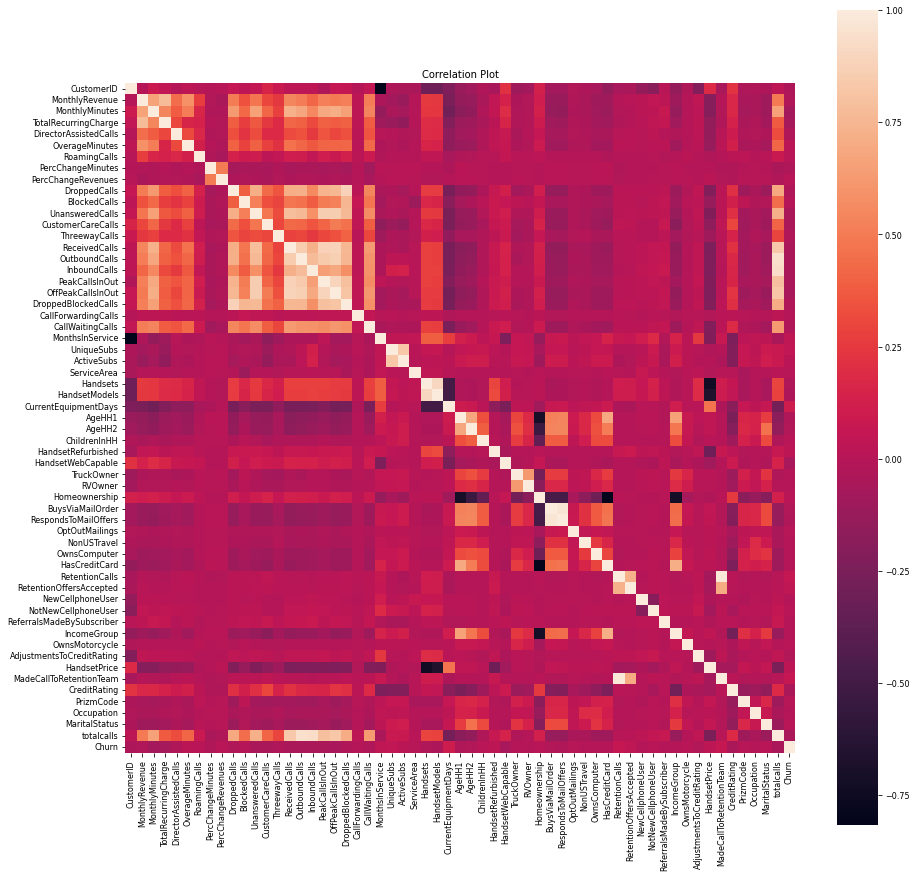

In [38]:
fig, ax =plt.subplots(figsize=(15,15))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool),
            square=True, ax=ax)
plt.show()

In [39]:
df.shape

(51047, 59)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

In [26]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [27]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

%matplotlib inline

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [73]:
features = ['MonthsInService','ServiceArea','Handsets', 'CurrentEquipmentDays','OwnsComputer','HasCreditCard','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser',          
'NotNewCellphoneUser','ReferralsMadeBySubscriber','IncomeGroup','OwnsMotorcycle','AdjustmentsToCreditRating', 'totalcalls',
'HandsetPrice','CreditRating','PrizmCode','Occupation','MaritalStatus','HandsetRefurbished','CreditRating','AdjustmentsToCreditRating','Handsets','HandsetWebCapable']

X = pd.get_dummies(df[features])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ros = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

lr = LogisticRegression()
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier(n_neighbors=3)
sv = SVC()
rf = RandomForestClassifier(n_estimators=50)

lr_scores = cross_val_score(lr, X_resampled, y_resampled, cv=5, scoring='accuracy')
dt_scores = cross_val_score(dt, X_resampled, y_resampled, cv=5, scoring='accuracy')
kn_scores = cross_val_score(kn, X_resampled, y_resampled, cv=5, scoring='accuracy')
sv_scores = cross_val_score(sv, X_resampled, y_resampled, cv=5, scoring='accuracy')
rf_scores = cross_val_score(rf, X_resampled, y_resampled, cv=5, scoring='accuracy')


print('lr:', lr_scores.mean())
print('dt:', dt_scores.mean())
print('kn:', kn_scores.mean())
print('svc:', sv_scores.mean())
print('rf:', rf_scores.mean())

lr: 0.5626774847870183
dt: 0.5333671399594321
kn: 0.5221095334685598
svc: 0.5682555780933063
rf: 0.5768762677484787


In [76]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     11995
           1       0.32      0.34      0.33      4851

    accuracy                           0.60     16846
   macro avg       0.52      0.52      0.52     16846
weighted avg       0.61      0.60      0.61     16846



In [77]:
features = ['MonthsInService','ServiceArea','Handsets', 'CurrentEquipmentDays','OwnsComputer','HasCreditCard','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser',          
'NotNewCellphoneUser','ReferralsMadeBySubscriber','IncomeGroup','OwnsMotorcycle','AdjustmentsToCreditRating', 
'HandsetPrice','CreditRating','PrizmCode','Occupation','MaritalStatus','HandsetRefurbished','totalcalls']

X = pd.get_dummies(df[features])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



ros = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

lr = LogisticRegression()
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier(n_neighbors=3)
sv = SVC()
rf = RandomForestClassifier(n_estimators=50)

lr_scores = cross_val_score(lr, X_resampled, y_resampled, cv=5, scoring='recall')
dt_scores = cross_val_score(dt, X_resampled, y_resampled, cv=5, scoring='recall')
kn_scores = cross_val_score(kn, X_resampled, y_resampled, cv=5, scoring='recall')
sv_scores = cross_val_score(sv, X_resampled, y_resampled, cv=5, scoring='recall')
rf_scores = cross_val_score(rf, X_resampled, y_resampled, cv=5, scoring='recall')


print('lr:', lr_scores.mean())
print('dt:', dt_scores.mean())
print('kn:', kn_scores.mean())
print('svc:', sv_scores.mean())
print('rf:', rf_scores.mean())

lr: 0.5772819472616633
dt: 0.5421906693711968
kn: 0.5346855983772819
svc: 0.639553752535497
rf: 0.5632860040567952


In [81]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.94      0.82     11995
           1       0.43      0.10      0.17      4851

    accuracy                           0.70     16846
   macro avg       0.58      0.52      0.49     16846
weighted avg       0.64      0.70      0.63     16846



In [84]:
features = ['MonthsInService','ServiceArea','Handsets', 'CurrentEquipmentDays','OwnsComputer','HasCreditCard','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser',          
'NotNewCellphoneUser','ReferralsMadeBySubscriber','IncomeGroup','OwnsMotorcycle','AdjustmentsToCreditRating', 
'HandsetPrice','CreditRating','PrizmCode','Occupation','MaritalStatus','HandsetRefurbished','totalcalls']

X = pd.get_dummies(df[features])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ros = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

lr = LogisticRegression()
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier(n_neighbors=3)
sv = SVC()
rf = RandomForestClassifier(n_estimators=50)

lr_scores = cross_val_score(lr, X_resampled, y_resampled, cv=5, scoring='precision')
dt_scores = cross_val_score(dt, X_resampled, y_resampled, cv=5, scoring='precision')
kn_scores = cross_val_score(kn, X_resampled, y_resampled, cv=5, scoring='precision')
sv_scores = cross_val_score(sv, X_resampled, y_resampled, cv=5, scoring='precision')
rf_scores = cross_val_score(rf, X_resampled, y_resampled, cv=5, scoring='precision')


print('lr:', lr_scores.mean())
print('dt:', dt_scores.mean())
print('kn:', kn_scores.mean())
print('svc:', sv_scores.mean())
print('rf:', rf_scores.mean())

lr: 0.5619524880420178
dt: 0.5374990754545725
kn: 0.5273847413428225
svc: 0.5609923789148402
rf: 0.5794787084707604


In [85]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.95      0.82     11995
           1       0.43      0.10      0.17      4851

    accuracy                           0.70     16846
   macro avg       0.58      0.52      0.49     16846
weighted avg       0.64      0.70      0.63     16846



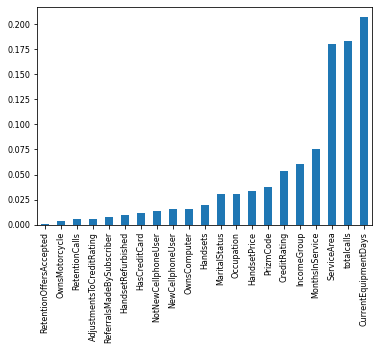

In [86]:
# Model interpretation

dt.fit(X_train, y_train)

pd.Series(dt.feature_importances_, index=X.columns).sort_values().plot(kind='bar');

## Modeling

In [87]:
features = ['CurrentEquipmentDays','MonthsInService','ServiceArea','IncomeGroup','CreditRating','PrizmCode','HandsetPrice','Occupation','totalcalls']

X = pd.get_dummies(df[features].fillna(0))
y = df['Churn']



X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)



In [91]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=5)

scores = []
for train_index, val_index in kf.split(X_train_full):
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    
  #  model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
   # model = LogisticRegression()
    model = RandomForestClassifier(n_estimators=50)
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_val_scaled)
    
    score = accuracy_score(y_val, y_pred)
    
    scores.append(score)
    
np.mean(scores)

0.6969660935704678

In [92]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train_full, y_train_full)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      7268
           1       0.40      0.12      0.19      2942

    accuracy                           0.69     10210
   macro avg       0.56      0.52      0.50     10210
weighted avg       0.63      0.69      0.63     10210



In [94]:
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=5)

scores = []
for train_index, val_index in kf.split(X_train_full):
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    ros = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    
  #  model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
   # model = LogisticRegression()
    model = RandomForestClassifier(n_estimators=50)
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_val_scaled)
    
    score = precision_score(y_val, y_pred)
    
    scores.append(score)
    
np.mean(scores)

0.41738106960117943

In [95]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train_full, y_train_full)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      7268
           1       0.39      0.12      0.18      2942

    accuracy                           0.69     10210
   macro avg       0.56      0.52      0.50     10210
weighted avg       0.63      0.69      0.63     10210



In [96]:
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=5)

scores = []
for train_index, val_index in kf.split(X_train_full):
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    ros = RandomUnderSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    
    model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
   # model = LogisticRegression()
    # model = RandomForestClassifier(n_estimators=50)
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_val_scaled)
    
    score = accuracy_score(y_val, y_pred)
    
    scores.append(score)
    
np.mean(scores)

0.7118300164525856

In [97]:
model = DecisionTreeClassifier(max_depth=3, criterion='entropy')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      7268
           1       0.00      0.00      0.00      2942

    accuracy                           0.71     10210
   macro avg       0.36      0.50      0.42     10210
weighted avg       0.51      0.71      0.59     10210



C:\Users\leish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\leish\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

kf = KFold(n_splits=5)

scores = []
for train_index, val_index in kf.split(X_train_full):
    X_train, X_val = X_train_full.iloc[train_index], X_train_full.iloc[val_index]
    y_train, y_val = y_train_full.iloc[train_index], y_train_full.iloc[val_index]
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_scaled = scaler.transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    
    model = DecisionTreeClassifier()
    # model = LogisticRegression()
    # model = RandomForestClassifier(n_estimators=50)
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_val_scaled)
    
    score = recall_score(y_val, y_pred)
    
    scores.append(score)
    
np.mean(scores)

0.34604741429771674

## ## Pipeline and gridsearch

In [102]:
features = ['CurrentEquipmentDays','MonthsInService','ServiceArea','IncomeGroup','CreditRating','PrizmCode','HandsetPrice','Occupation','totalcalls']

X = pd.get_dummies(df[features].fillna(0))
y = df['Churn']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [103]:
from sklearn.pipeline import Pipeline

In [104]:
from sklearn.impute import SimpleImputer

In [105]:
from sklearn.preprocessing import StandardScaler

In [106]:
from imblearn.under_sampling import RandomUnderSampler

In [107]:
from imblearn.pipeline import Pipeline

In [108]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'rf__n_estimators': range(10,60,10),
    'rf__max_depth':[2,5,10,20],
    'rf__min_samples_split': range(50,70,20),     #'rf__maxfeatures': range(1,6,1),
    'rf__criterion': ['gini', 'entropy'],
    'scaling__with_mean': [True, False],
    'imputer__strategy': ['mean', 'median', 'constant']
}

#RUS = RandomUnderSampler(random_state=42)
#RFC = RandomForestClassifier()




pipe = Pipeline([
    ('imputer', SimpleImputer()),  #handle null value
    ('scaling', StandardScaler()),
    ('rus', RandomOverSampler()),
    ('rf', RandomForestClassifier(random_state=42))
                ])

#gs = GridSearchCV(pipe, parameters, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)
#scoring='roc_auc'
gs = GridSearchCV(pipe, parameters, cv=5, scoring='recall', n_jobs=1, verbose=2)   


gs.fit(X_train_full, y_train_full)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_

[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.3s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.3s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean,

[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.6s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strateg

[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.8s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strate

[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END im

[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END im

[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.0s
[CV] 

[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.8s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   1.0s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   1.0s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   1.0s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.5s
[CV] 

[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.3s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__

[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.4s
[CV] END imputer__s

[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.8s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.8s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] END imput

[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.5s
[CV] END imput

[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.3s
[CV

[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.7s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.7s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV

[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.

[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.8s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.8s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.6s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.4s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1

[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.3s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END

[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.4s
[CV] END

[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.8s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.8s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.8s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.7s
[C

[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.3s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.2s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.1s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.3s
[C

[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.3s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time

[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.4s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total tim

[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.0s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; to

[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.5s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; t

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaling', StandardScaler()),
                                       ('rus', RandomOverSampler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'imputer__strategy': ['mean', 'median', 'constant'],
                         'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [2, 5, 10, 20],
                         'rf__min_samples_split': range(50, 70, 20),
                         'rf__n_estimators': range(10, 60, 10),
                         'scaling__with_mean': [True, False]},
             scoring='recall', verbose=2)

In [109]:
best_model = gs.best_estimator_
best_model

Pipeline(steps=[('imputer', SimpleImputer()),
                ('scaling', StandardScaler(with_mean=False)),
                ('rus', RandomOverSampler()),
                ('rf',
                 RandomForestClassifier(max_depth=2, min_samples_split=50,
                                        n_estimators=10, random_state=42))])

In [110]:
best_model = gs.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.44      0.56      7268
           1       0.34      0.73      0.47      2942

    accuracy                           0.52     10210
   macro avg       0.57      0.58      0.52     10210
weighted avg       0.67      0.52      0.54     10210



In [114]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'rf__n_estimators': range(10,60,10),
    'rf__max_depth':[2,5,10,20],
    'rf__min_samples_split': range(50,70,20),     #'rf__maxfeatures': range(1,6,1),
    'rf__criterion': ['gini', 'entropy'],
    'scaling__with_mean': [True, False],
    'imputer__strategy': ['mean', 'median', 'constant']
}

#RUS = RandomUnderSampler(random_state=42)
#RFC = RandomForestClassifier()




pipe = Pipeline([
    ('imputer', SimpleImputer()),  #handle null value
    ('scaling', StandardScaler()),
    ('rus', RandomOverSampler()),
    ('rf', RandomForestClassifier(random_state=42))
                ])

#gs = GridSearchCV(pipe, parameters, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)
#scoring='roc_auc'
gs = GridSearchCV(pipe, parameters, cv=5, scoring='precision', n_jobs=1, verbose=2)   


gs.fit(X_train_full, y_train_full)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.0s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_

[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean,

[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.3s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strateg

[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.6s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.7s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.9s
[CV] END imputer__strategy=mean, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strate

[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.4s
[CV] END im

[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END im

[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] 

[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.9s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=mean, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.9s
[CV] 

[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.3s
[CV] END imputer_

[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.6s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__

[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.7s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.8s
[CV] END impu

[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.8s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.6s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   2.1s
[CV] END imputer__strategy=median, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.7s
[CV] END impu

[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.3s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[

[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.6s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.5s
[

[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.0s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   

[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.8s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.9s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.8s
[CV] END imputer__strategy=median, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=  

[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.2s
[CV] 

[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.4s
[CV] 

[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.4s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   0.9s

[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=gini, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total time=   1.1s

[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.1s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=2, rf__min_samples_split=50, rf__n_estimators=20, scaling__with_mean=True; total 

[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.3s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.2s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=5, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total 

[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.5s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=10, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; t

[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.8s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.9s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=True; total time=   0.8s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.6s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; total time=   0.7s
[CV] END imputer__strategy=constant, rf__criterion=entropy, rf__max_depth=20, rf__min_samples_split=50, rf__n_estimators=10, scaling__with_mean=False; to

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('scaling', StandardScaler()),
                                       ('rus', RandomOverSampler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=1,
             param_grid={'imputer__strategy': ['mean', 'median', 'constant'],
                         'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [2, 5, 10, 20],
                         'rf__min_samples_split': range(50, 70, 20),
                         'rf__n_estimators': range(10, 60, 10),
                         'scaling__with_mean': [True, False]},
             scoring='precision', verbose=2)

In [115]:
best_model = gs.best_estimator_
best_model


Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaling', StandardScaler(with_mean=False)),
                ('rus', RandomOverSampler()),
                ('rf',
                 RandomForestClassifier(criterion='entropy', max_depth=20,
                                        min_samples_split=50, n_estimators=50,
                                        random_state=42))])

In [116]:
best_model = gs.best_estimator_

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.64      0.70      7268
           1       0.37      0.52      0.43      2942

    accuracy                           0.60     10210
   macro avg       0.57      0.58      0.56     10210
weighted avg       0.65      0.60      0.62     10210



## Deep Learning

## simple neural network

In [23]:
from tensorflow.keras.metrics import Recall

In [273]:
features = ['CustomerID','MonthlyRevenue','MonthlyMinutes','TotalRecurringCharge','DirectorAssistedCalls','OverageMinutes',
         'RoamingCalls','PercChangeMinutes','PercChangeRevenues','DroppedCalls','BlockedCalls','UnansweredCalls','CustomerCareCalls',
         'ThreewayCalls','ReceivedCalls','OutboundCalls','InboundCalls','PeakCallsInOut','OffPeakCallsInOut','DroppedBlockedCalls','CallForwardingCalls'
         ,'CallWaitingCalls','MonthsInService','UniqueSubs','ActiveSubs','ServiceArea','Handsets','HandsetModels',              
'CurrentEquipmentDays','AgeHH1','AgeHH2','ChildrenInHH','HandsetRefurbished','HandsetWebCapable','TruckOwner','RVOwner','Homeownership','BuysViaMailOrder','RespondsToMailOffers','OptOutMailings',          
'NonUSTravel','OwnsComputer','HasCreditCard','RetentionCalls','RetentionOffersAccepted','NewCellphoneUser',          
'NotNewCellphoneUser','ReferralsMadeBySubscriber','IncomeGroup','OwnsMotorcycle','AdjustmentsToCreditRating', 
'HandsetPrice','MadeCallToRetentionTeam','CreditRating','PrizmCode','Occupation','MaritalStatus','totalcalls']

X = pd.get_dummies(df[features])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42, stratify=y_resampled)

In [159]:
X_train.shape

(34201, 58)

In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Activation

In [213]:
model = Sequential()

# input layer
model.add(Dense(58,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(30, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [214]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [215]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          batch_size=256,
          validation_data=(X_test, y_test),verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/40
134/134 [==============================] - 2s 5ms/step - loss: 7802.4351 - accuracy: 0.6538 - val_loss: 0.6945 - val_accuracy: 0.5001
Epoch 2/40
134/134 [==============================] - 0s 3ms/step - loss: 616.4985 - accuracy: 0.6871 - val_loss: 0.6993 - val_accuracy: 0.5001
Epoch 3/40
134/134 [==============================] - 0s 3ms/step - loss: 280.7138 - accuracy: 0.6950 - val_loss: 0.7070 - val_accuracy: 0.5001
Epoch 4/40
134/134 [==============================] - 0s 3ms/step - loss: 129.4936 - accuracy: 0.7011 - val_loss: 0.7167 - val_accuracy: 0.5001
Epoch 5/40
134/134 [==============================] - 0s 3ms/step - loss: 108.7111 - accuracy: 0.7045 - val_loss: 0.7273 - val_accuracy: 0.5001
Epoch 6/40
134/134 [==============================] - 0s 3ms/step - loss: 67.7694 - accuracy: 0.7034 - val_loss: 0.7382 - val_accuracy: 0.5001
Epoch 7/40
134/134 [==============================] - 0s 4ms/step - loss: 39.3731 - accuracy: 0.7062 - val_loss: 0.7484 - val_accuracy: 

In [275]:
# model = Sequential()
# model.add(Flatten(input_shape=(58,)))
# model.add(Dense(58, activation='relu'))
# model.add(Dense(29, activation='relu'))
# model.add(Dense(14, activation='softmax'))

In [274]:
# X_val = X_train_full[:10000]    
# X_train = X_train_full[10000:]    

# y_val = y_train_full[:10000]
# y_train = y_train_full[10000:]

In [276]:
#model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['recall'])

In [278]:
#history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

In [124]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,22524.222656,0.608637,0.694215,0.500051
1,601.407715,0.697436,0.702281,0.500051
2,164.981659,0.708400,0.712962,0.500051
3,94.280495,0.709336,0.724647,0.500051
4,72.564308,0.710038,0.736497,0.500051
5,49.966122,0.710944,0.747319,0.500051
6,41.310345,0.710476,0.757322,0.500051
7,27.244556,0.711266,0.766082,0.500051
8,32.106998,0.710915,0.773251,0.500051
9,29.483229,0.711120,0.778451,0.500051


<AxesSubplot:>

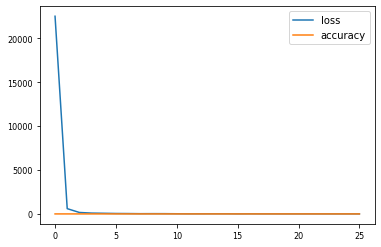

In [168]:
losses[['loss','accuracy']].plot()

In [169]:
features = ['CurrentEquipmentDays','MonthsInService','ServiceArea','IncomeGroup','CreditRating','PrizmCode','HandsetPrice','Occupation','totalcalls']

X = pd.get_dummies(df[features])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42, stratify=y_resampled)

In [170]:
model = Sequential()

# input layer
model.add(Dense(9,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [171]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [172]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          batch_size=256,
          validation_data=(X_test, y_test),verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/40
134/134 [==============================] - 2s 6ms/step - loss: 2.3600 - accuracy: 0.5422 - val_loss: 0.6934 - val_accuracy: 0.5001
Epoch 2/40
134/134 [==============================] - 0s 3ms/step - loss: 1.0555 - accuracy: 0.6979 - val_loss: 0.6980 - val_accuracy: 0.5001
Epoch 3/40
134/134 [==============================] - 0s 2ms/step - loss: 0.7794 - accuracy: 0.6985 - val_loss: 0.7065 - val_accuracy: 0.5001
Epoch 4/40
134/134 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.7054 - val_loss: 0.7173 - val_accuracy: 0.5001
Epoch 5/40
134/134 [==============================] - 0s 2ms/step - loss: 0.6550 - accuracy: 0.7087 - val_loss: 0.7293 - val_accuracy: 0.5001
Epoch 6/40
134/134 [==============================] - 0s 3ms/step - loss: 0.6391 - accuracy: 0.7078 - val_loss: 0.7411 - val_accuracy: 0.5001
Epoch 7/40
134/134 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7078 - val_loss: 0.7517 - val_accuracy: 0.5001
Epoch 

In [173]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,2.359994,0.542236,0.693443,0.500051
1,1.055460,0.697904,0.698009,0.500051
2,0.779445,0.698547,0.706463,0.500051
3,0.680076,0.705389,0.717280,0.500051
4,0.654982,0.708693,0.729313,0.500051
5,0.639066,0.707757,0.741103,0.500051
6,0.627018,0.707845,0.751686,0.500051
7,0.622493,0.709131,0.761063,0.500051
8,0.616806,0.709979,0.768914,0.500051
9,0.614251,0.709921,0.775561,0.500051


<AxesSubplot:>

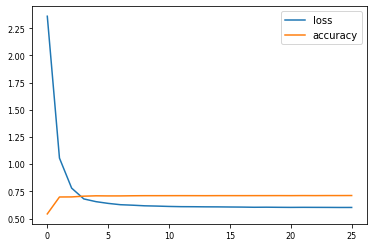

In [174]:
losses[['loss','accuracy']].plot()

In [ ]:
## Recall

In [107]:
features = ['CurrentEquipmentDays','MonthsInService','ServiceArea','IncomeGroup','CreditRating','PrizmCode','HandsetPrice','Occupation','totalcalls']

X = pd.get_dummies(df[features])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_resampled, y_resampled, test_size=0.30, random_state=42, stratify=y_resampled)

In [108]:
model = Sequential()

# input layer
model.add(Dense(28,  activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['Recall'])

In [109]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [110]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=20,
          batch_size=256,
          validation_data=(X_test, y_test),verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/20
134/134 [==============================] - 1s 5ms/step - loss: 0.7085 - recall: 0.1671 - val_loss: 0.7099 - val_recall: 4.1085e-04
Epoch 2/20
134/134 [==============================] - 0s 4ms/step - loss: 0.6533 - recall: 0.0520 - val_loss: 0.7208 - val_recall: 0.0000e+00
Epoch 3/20
134/134 [==============================] - 0s 4ms/step - loss: 0.6374 - recall: 0.0229 - val_loss: 0.7282 - val_recall: 0.0000e+00
Epoch 4/20
134/134 [==============================] - 0s 3ms/step - loss: 0.6255 - recall: 0.0110 - val_loss: 0.7352 - val_recall: 0.0000e+00
Epoch 5/20
134/134 [==============================] - 0s 3ms/step - loss: 0.6202 - recall: 0.0089 - val_loss: 0.7414 - val_recall: 0.0000e+00
Epoch 6/20
134/134 [==============================] - 0s 3ms/step - loss: 0.6157 - recall: 0.0064 - val_loss: 0.7467 - val_recall: 0.0000e+00
Epoch 7/20
134/134 [==============================] - 0s 3ms/step - loss: 0.6143 - recall: 0.0038 - val_loss: 0.7511 - val_recall: 0.0000e+00
Epoch 

In [111]:
losses = pd.DataFrame(model.history.history)
losses

,loss,recall,val_loss,val_recall
0,0.708549,0.167140,0.709922,0.000411
1,0.653318,0.052028,0.720811,0.000000
2,0.637408,0.022921,0.728204,0.000000
3,0.625534,0.010953,0.735239,0.000000
4,0.620177,0.008925,0.741362,0.000000
5,0.615709,0.006389,0.746675,0.000000
6,0.614276,0.003753,0.751056,0.000000
7,0.611009,0.003347,0.755272,0.000000
8,0.608208,0.002434,0.758942,0.000000
9,0.607449,0.001724,0.762128,0.000000


<AxesSubplot:>

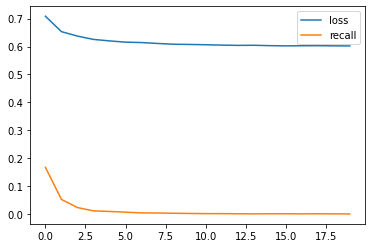

In [114]:
losses[['loss','recall']].plot()

In [249]:
features = ['CurrentEquipmentDays','MonthsInService','ServiceArea','IncomeGroup','CreditRating','PrizmCode','HandsetPrice','Occupation','totalcalls']

X = pd.get_dummies(df[features])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train_full, X_test, y_train_full, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20, random_state=42, stratify=y_resampled)

In [250]:
model = Sequential()

# input layer
model.add(Dense(9,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(3, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Recall'])

In [251]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [252]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          batch_size=256,
          validation_data=(X_test, y_test),verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/40
134/134 [==============================] - 2s 4ms/step - loss: 0.6258 - recall: 0.0000e+00 - val_loss: 0.7502 - val_recall: 0.0000e+00
Epoch 2/40
134/134 [==============================] - 0s 3ms/step - loss: 0.6109 - recall: 0.0000e+00 - val_loss: 0.7628 - val_recall: 0.0000e+00
Epoch 3/40
134/134 [==============================] - 0s 2ms/step - loss: 0.6060 - recall: 0.0000e+00 - val_loss: 0.7739 - val_recall: 0.0000e+00
Epoch 4/40
134/134 [==============================] - 0s 3ms/step - loss: 0.6050 - recall: 0.0000e+00 - val_loss: 0.7702 - val_recall: 0.0000e+00
Epoch 5/40
134/134 [==============================] - 0s 3ms/step - loss: 0.6035 - recall: 0.0000e+00 - val_loss: 0.7795 - val_recall: 0.0000e+00
Epoch 6/40
134/134 [==============================] - 0s 2ms/step - loss: 0.6026 - recall: 0.0000e+00 - val_loss: 0.7747 - val_recall: 0.0000e+00
Epoch 7/40
134/134 [==============================] - 0s 3ms/step - loss: 0.6027 - recall: 0.0000e+00 - val_loss: 0.7785 - v

In [253]:
losses = pd.DataFrame(model.history.history)
losses

,loss,recall,val_loss,val_recall
0,0.625759,0.0,0.750223,0.0
1,0.610889,0.0,0.762814,0.0
2,0.606050,0.0,0.773868,0.0
3,0.605035,0.0,0.770248,0.0
4,0.603492,0.0,0.779450,0.0
5,0.602644,0.0,0.774656,0.0
6,0.602677,0.0,0.778523,0.0
7,0.601335,0.0,0.785890,0.0
8,0.601211,0.0,0.776634,0.0
9,0.601086,0.0,0.775552,0.0


<AxesSubplot:>

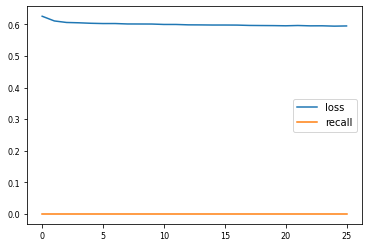

In [254]:
losses[['loss','recall']].plot()